In [ ]:
# README

# This program is designed to predict the average price of NFT items ('stats_average_price') with KNN Algorithm based on the following attributes:
#     - stats_seven_day_volume
#     - stats_seven_day_change
#     - stats_seven_day_sales
#     - stats_seven_day_average_price

In [ ]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# import file
collections = pd.read_csv('../content/Collections.csv')

In [ ]:
# seeing data without table
collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    object 
 2   primary_asset_contracts_created_date                 962 non-null    object 
 3   primary_asset_contracts_name                         961 non-null    object 
 4   primary_asset_contracts_nft_version                  870 non-null    object 
 5   primary_asset_contracts_owner                        909 non-null    float64
 6   primary_asset_contracts_schema_name                  962 non-null    object 
 7   primary_asset_contracts_symbol                       894 non-null    object 
 8   primary_asset_contracts_total_supply                 772 non-null   

In [ ]:
# choose the attribute to be used
dataframe = collections[['stats_average_price', 'stats_seven_day_volume', 'stats_seven_day_change', 'stats_seven_day_sales', 'stats_seven_day_average_price']]

# delete rows that have value NaN
dataframe.dropna(inplace=True)

# display the first 5 data
dataframe.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,stats_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price
0,0.062486,0.210000,-0.468354,4,0.052500
1,0.049917,0.543511,-0.192885,24,0.022646
2,0.019447,0.171000,-0.250000,9,0.019000
3,0.054100,0.251500,-0.405437,18,0.013972
4,0.134088,17.672858,-0.608661,223,0.079250


In [ ]:
# see the data type of the dataframe
dataframe.dtypes

stats_average_price              float64
stats_seven_day_volume           float64
stats_seven_day_change           float64
stats_seven_day_sales              int64
stats_seven_day_average_price    float64
dtype: object

In [ ]:
# detail
dataframe.describe()

,stats_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000
mean,0.472879,78.462265,0.359122,193.095305,0.539413
std,1.679501,416.629583,4.484762,818.742395,3.635685
min,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.059775,0.193200,-0.515376,3.000000,0.030000
50%,0.136490,2.252000,0.000000,28.000000,0.085100
75%,0.318681,19.843905,0.000000,111.500000,0.229425
max,44.115137,6548.109382,144.978034,12354.000000,94.489253


In [ ]:
# DETERMINING DEPENDENT AND INDEPENDENT VARIABLES

# determine the independent variable from the data whose attributes have been selected
# x will hold the independent variable, where 'stats_average_price' is not a dependent variable so the column is discarded
x = dataframe.drop(['stats_average_price'], axis = 1)
x

,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price
0,0.210000,-0.468354,4,0.052500
1,0.543511,-0.192885,24,0.022646
2,0.171000,-0.250000,9,0.019000
3,0.251500,-0.405437,18,0.013972
4,17.672858,-0.608661,223,0.079250
...,...,...,...,...
1422,0.100000,0.000000,2,0.050000
1423,1021.840644,0.768475,3191,0.320226
1424,151.487900,-0.085863,120,1.262399
1425,0.147500,-0.401137,15,0.009833


In [ ]:
x.dtypes

stats_seven_day_volume           float64
stats_seven_day_change           float64
stats_seven_day_sales              int64
stats_seven_day_average_price    float64
dtype: object

In [ ]:
# determine the dependent variable
# 'stats_average_price' is used as dependent variable
y = dataframe['stats_average_price']
y.head()

0    0.062486
1    0.049917
2    0.019447
3    0.054100
4    0.134088
Name: stats_average_price, dtype: float64

In [ ]:
y.dtypes

dtype('float64')

In [ ]:
# Partitioning data for training and validation
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# Build a Machine Learning Model using the K-Nearest Neighbors algorithm
model = KNN(n_neighbors = 3)

In [ ]:
# Training data using the model that has been made

# models for training data
model.fit(train_x, train_y)
accuracy = model.score(test_x, test_y) # calculate accuracy score

# testing for predictions
test_predict = model.predict(test_x)
mse_score = mse(test_predict, test_y)
print(' MSE: ', mse_score, '\n', 'Accuracy: ', accuracy)

 MSE:  2.9305615313010995 
 Accuracy:  0.4301248285523296


In [ ]:
# create elbow method to determine the best K value

def elbow(k):
  # create an empty list
  list_accuracy = []

  # training data on each value of k
  for i in k:
    model = KNN(n_neighbors = i)
    model.fit(train_x, train_y)
    accuracy = model.score(test_x, test_y)
    list_accuracy.append(accuracy)
    
  return list_accuracy

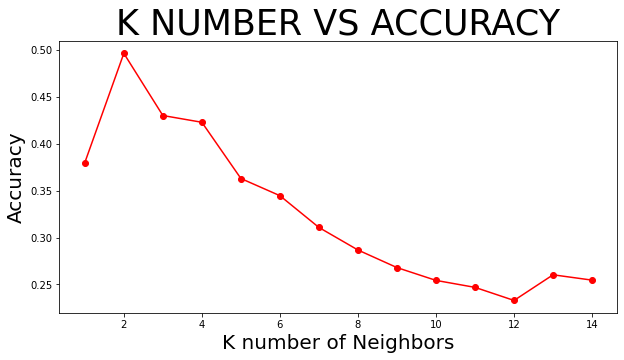

In [ ]:
# graph of k value vs accuracy

k = range(1, 15)
get_list_accuracy = elbow(k)

# plotting
plt.figure(figsize=(10,5))
plt.plot(k, get_list_accuracy, color='red', marker='o')
plt.xlabel('K number of Neighbors', fontdict={'fontsize': 20})
plt.ylabel('Accuracy', fontdict={'fontsize': 20})
plt.title('K NUMBER VS ACCURACY', fontdict={'fontsize': 35})
plt.show()

In [ ]:
# see accuracy(%) vs K number of Neighbors without graph
k = range(1, 15)
test = elbow(k)

print('K', '\t', 'Accuracy (%)')
print('---------------------------------')
for i in k:
  print(i, '\t', str((test[i-1]*100))+' %')

K 	 Accuracy (%)
---------------------------------
1 	 37.99172035115952 %
2 	 49.63996506986975 %
3 	 43.01248285523296 %
4 	 42.291790209800574 %
5 	 36.297252226197486 %
6 	 34.465474886637374 %
7 	 31.077411333359862 %
8 	 28.67436352914885 %
9 	 26.79953608036103 %
10 	 25.434051236354783 %
11 	 24.690328307552456 %
12 	 23.29706939140501 %
13 	 26.03122754339031 %
14 	 25.462329003621022 %


In [ ]:
# Determine the average price prediction based on the attributes stats_seven_day_volume, stats_seven_day_change, stats_seven_day_sales, stats_seven_day_average_price
# attribute format : [stats_seven_day_volume, stats_seven_day_change, stats_seven_day_sales, stats_seven_day_average_price]
# example : [19, 5.1, 24, 0.236123]

# PREDICTION

average_nft_price = np.array([[19, 5.1, 24, 0.236123]])
prediction = model.predict(average_nft_price)

print('Average NFT Price based on attributes a, b and c that have been entered is ' + str(prediction), 'ETH\n\n')

Average NFT Price based on attributes a, b and c that have been entered is [0.92045451] ETH




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
